# Exploratory data analysis

Before building any model, it is important to understand the dataset features. The columns *treatment, conversion, visit* and *exposure* were described and explored in the previous notebook. The feature values *f0,...,f11* are numeric (float) columns without direct semantic meaning, as they result from some previous feature engineering performed by Criteo.



In [1]:
import numpy as np 
import pandas as pd

DATA_PATH = '../data/raw/criteo-uplift-v2.1.csv'

df = pd.read_csv(DATA_PATH)

df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


In [2]:
# Describe only the features columns
feature_cols = ['f' + str(i) for i in range(12)]

df[feature_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
f0,13979592.0,19.620297,5.377464,12.616365,12.616365,21.923413,24.436459,26.745255
f1,13979592.0,10.069977,0.104756,10.059654,10.059654,10.059654,10.059654,16.344187
f2,13979592.0,8.446582,0.299316,8.214383,8.214383,8.214383,8.723335,9.051962
f3,13979592.0,4.178923,1.336645,-8.398387,4.679882,4.679882,4.679882,4.679882
f4,13979592.0,10.338837,0.343308,10.280525,10.280525,10.280525,10.280525,21.123508
f5,13979592.0,4.028513,0.431097,-9.011892,4.115453,4.115453,4.115453,4.115453
f6,13979592.0,-4.155356,4.577914,-31.429784,-6.699321,-2.411115,0.294443,0.294443
f7,13979592.0,5.101765,1.205248,4.833815,4.833815,4.833815,4.833815,11.998401
f8,13979592.0,3.933581,0.056660,3.635107,3.910792,3.971858,3.971858,3.971858
f9,13979592.0,16.027638,7.018975,13.190056,13.190056,13.190056,13.190056,75.295017


Each of the features has a different range of values and they are not scaled (for example, *f9* has the largest range of values while *f11* is the most "compacted"). Not only that but most of the features have Q25, Q50 and Q75 with almost the same value, that means that *"the center of mass is heavy"*. This can be explained by the feature engineering, maybe Criteo used some embeddings or maybe the original features were discretized...

 A boxplot can be a good way to visualize the dispersion but in large datasets with different features' ranges can be difficult to interpretate:

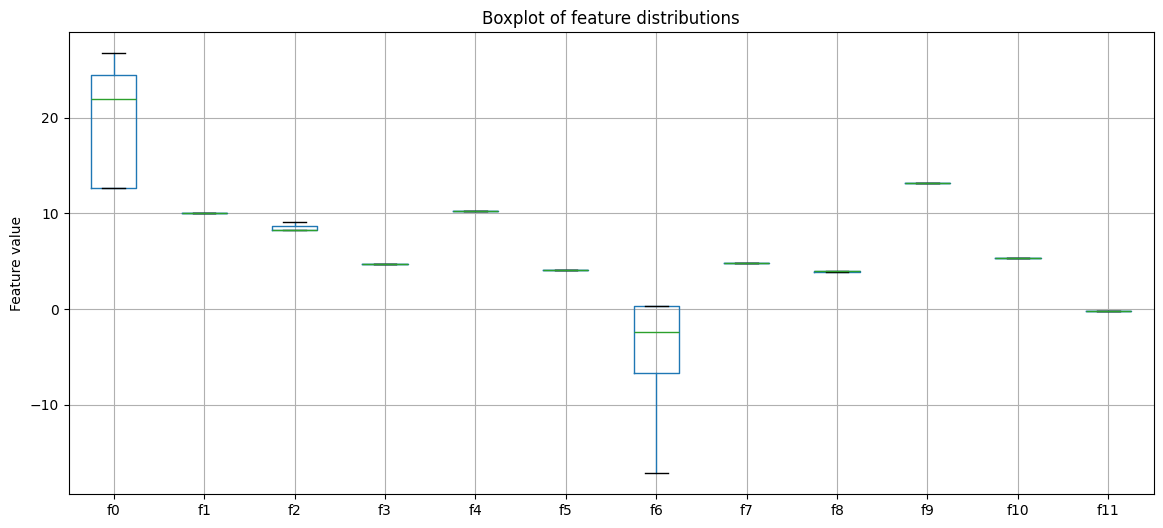

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
df[feature_cols].boxplot(showfliers=False)
plt.xticks(rotation=0)
plt.title("Boxplot of feature distributions")
plt.ylabel("Feature value")
plt.show()


Another way is to directly plot each feature histogram to see the distribution of each value. However, in this particular case the values are higly concentrated and so one 'bin' gets the most of the counts, making difficult the distribution analysis.

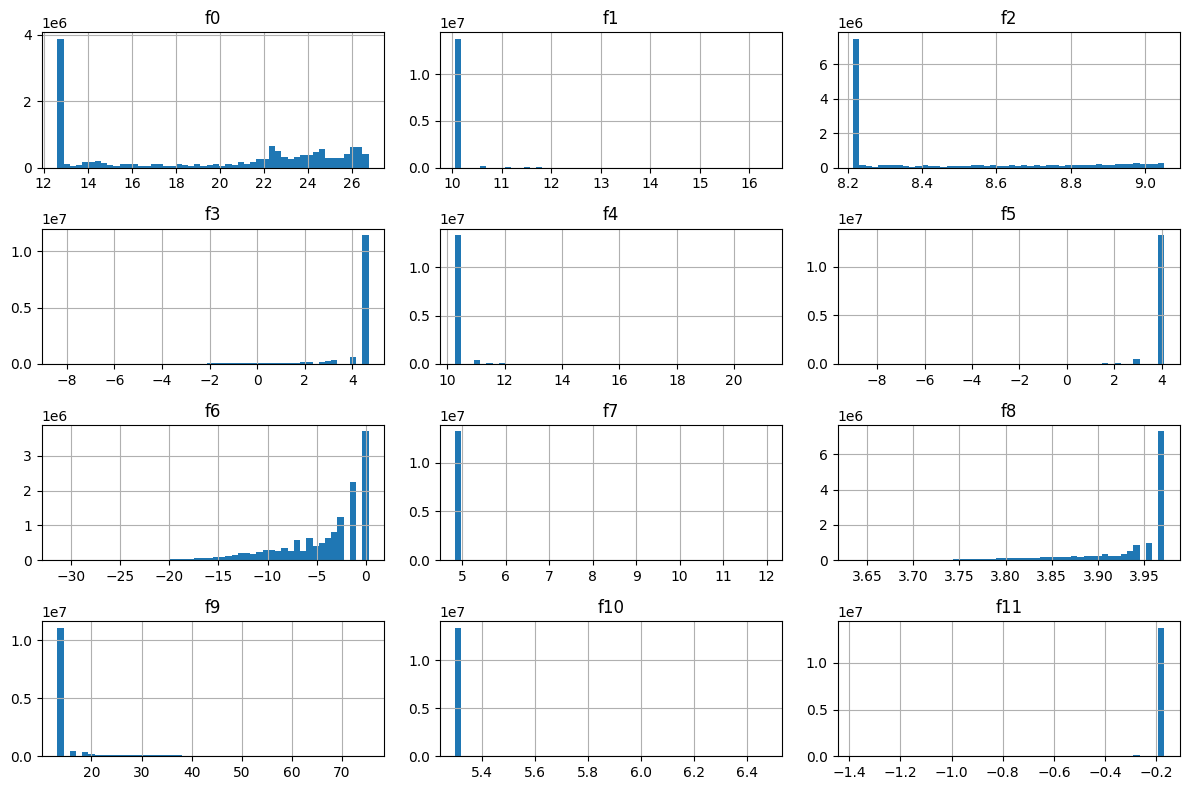

In [4]:
# Plot some histograms to see the distribution of values
df[feature_cols].hist(bins=50, figsize=(12,8))
plt.tight_layout()


A way to surpass this issue can be use a logarithmic scale in the "counts" axis:

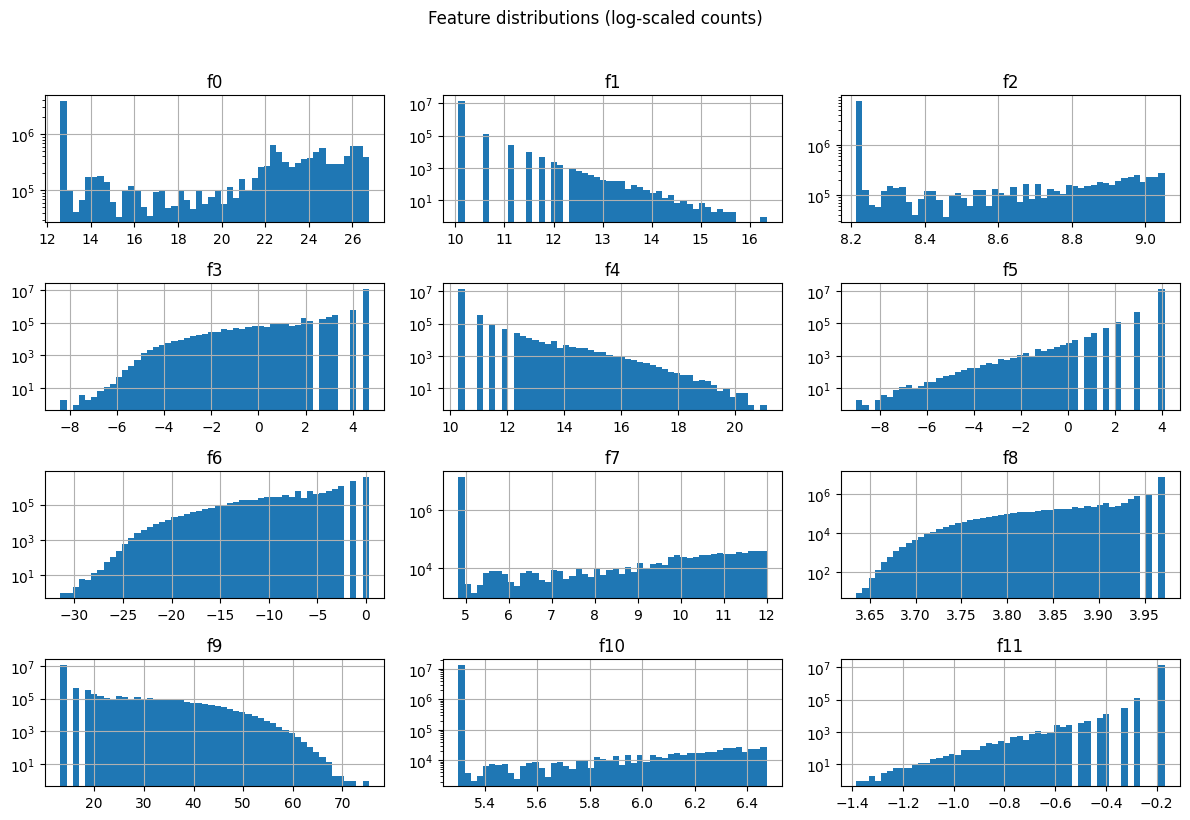

In [5]:
# Same histograms with logarithmic scale

axes = df[feature_cols].hist(
    bins=50,
    figsize=(12,8),
    log=True  
)

plt.suptitle("Feature distributions (log-scaled counts)", y=1.02)
plt.tight_layout()
plt.show()





In [6]:
# And show some quantile

df[feature_cols].quantile([0.01, 0.25, 0.5, 0.75, 0.99]).T

,0.01,0.25,0.50,0.75,0.99
f0,12.616365,12.616365,21.923413,24.436459,26.672876
f1,10.059654,10.059654,10.059654,10.059654,10.679513
f2,8.214383,8.214383,8.214383,8.723335,9.042916
f3,-1.733228,4.679882,4.679882,4.679882,4.679882
f4,10.280525,10.280525,10.280525,10.280525,11.973287
f5,2.230907,4.115453,4.115453,4.115453,4.115453
f6,-17.777273,-6.699321,-2.411115,0.294443,0.294443
f7,4.833815,4.833815,4.833815,4.833815,11.482084
f8,3.751603,3.910792,3.971858,3.971858,3.971858
f9,13.190056,13.190056,13.190056,13.190056,44.893640


Another important feature analysis is the correlation between them; this can be critical when training any model

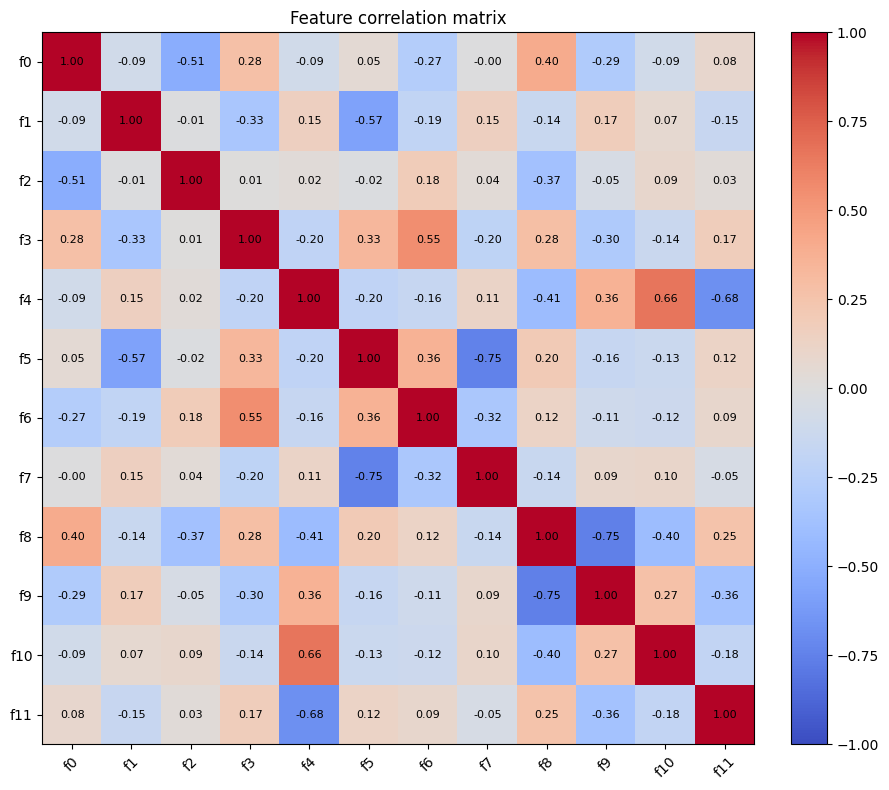

In [7]:
# Correlation matrix to show the correlation
corr = df[feature_cols].corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)

plt.xticks(range(len(feature_cols)), feature_cols, rotation=45)
plt.yticks(range(len(feature_cols)), feature_cols)

for i in range(len(feature_cols)):
    for j in range(len(feature_cols)):
        plt.text(
            j, i,
            f"{corr.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            color="black",
            fontsize=8
        )

plt.title("Feature correlation matrix")
plt.tight_layout()
plt.show()



In general, there is little correlation between features with some exceptions:
- *f5* and *f7* have a -0.75 correlation, the highest between every feature.
- *f4* and *f11* also have a high correlation of -0.68, followed by *f4* and *f10* with 0.66, *f5* and *f2* with -0.57, and *f6* and *f3* with 0.55

### Conclusions 

From the exploratory analysis of the feature set, we can draw the following conclusions:

- The features are continuous numeric variables with heterogeneous ranges and heavy-tailed distributions, which is consistent with the effect of featrue engineering.
- Several features show a high concentration of values around specific points (*"center of mass"*), explaining the limited interpretability of boxplots and standard histograms without log-scaling.
- No strange behaviors were detected: there are no constant features, no extreme numerical instabilities, and all features present sufficient dispersion to support statistical modeling.
- Correlations between features are generally moderate, with a few notable exceptions (e.g., f5–f7, f4–f11), suggesting some redundancy but no severe multicollinearity issues.
- Overall, the feature set appears suitable for modeling using regularized linear models as a first baseline, without the need for aggressive preprocessing or feature transformations.

This exploratory analysis provides confidence to proceed with baseline modeling while keeping model complexity under control.


### Extra:

Standarization of the features

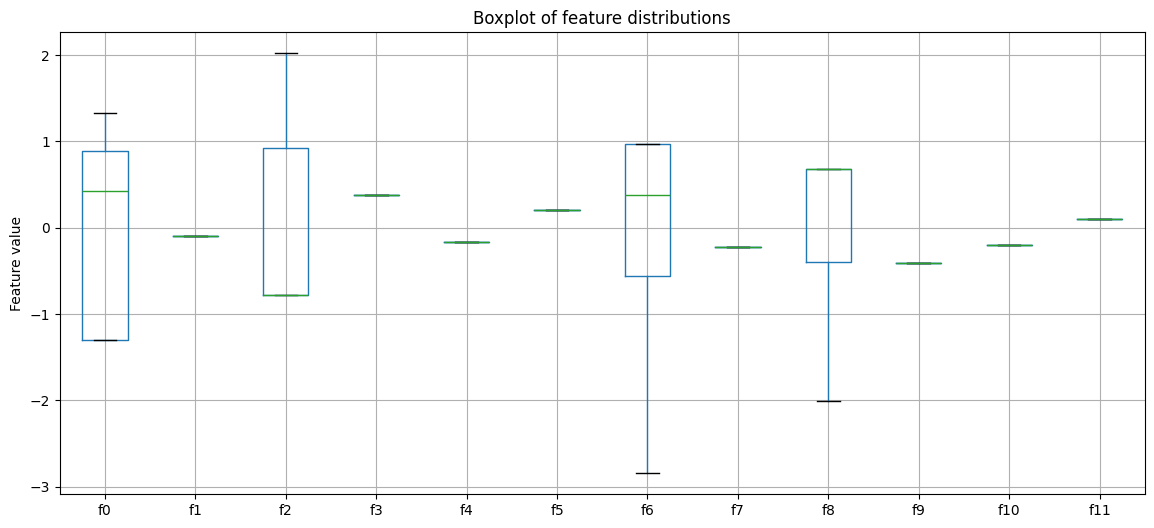

         0.01      0.25      0.50      0.75      0.99
f0  -1.302460 -1.302460  0.428290  0.895619  1.311507
f1  -0.098534 -0.098534 -0.098534 -0.098534  5.818642
f2  -0.775767 -0.775767 -0.775767  0.924618  1.992321
f3  -4.423128  0.374788  0.374788  0.374788  0.374788
f4  -0.169853 -0.169853 -0.169853 -0.169853  4.760884
f5  -4.169837  0.201673  0.201673  0.201673  0.201673
f6  -2.975573 -0.555704  0.381012  0.972014  0.972014
f7  -0.222320 -0.222320 -0.222320 -0.222320  5.293782
f8  -3.211772 -0.402207  0.675564  0.675564  0.675564
f9  -0.404273 -0.404273 -0.404273 -0.404273  4.112567
f10 -0.196284 -0.196284 -0.196284 -0.196284  5.967292
f11 -4.221258  0.100208  0.100208  0.100208  0.100208


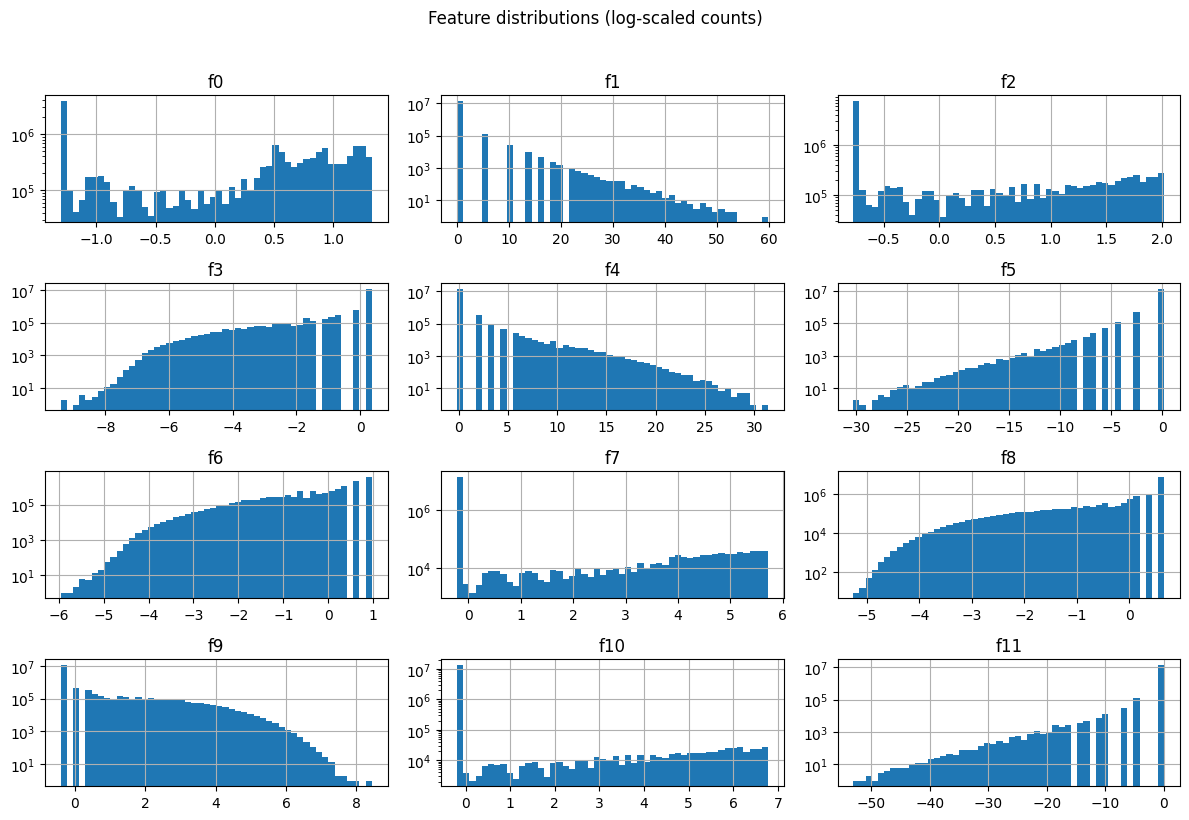

In [12]:
from sklearn.preprocessing import StandardScaler

X = df[feature_cols]
scaler = StandardScaler()
Z = scaler.fit_transform(X)

Z = pd.DataFrame(Z, columns=feature_cols, index=df.index)



plt.figure(figsize=(14,6))
Z.boxplot(showfliers=False)
plt.xticks(rotation=0)
plt.title("Boxplot of feature distributions")
plt.ylabel("Feature value")
plt.show()


print(Z.quantile([0.01, 0.25, 0.5, 0.75, 0.99]).T)



axes = Z.hist(
    bins=50,
    figsize=(12,8),
    log=True  
)

plt.suptitle("Feature distributions (log-scaled counts)", y=1.02)
plt.tight_layout()
plt.show()


